In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    load_img,
    img_to_array,
)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_path = "data\\train"
validation_path = "data\\validation"
test_path = "data\\test"

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=train_path,
    target_size=(256, 256),
    classes=["cats", "dogs"],
    batch_size=10,
)

assert train_generator.n > 0

validation_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=validation_path,
    target_size=(256, 256),
    classes=["cats", "dogs"],
    batch_size=10,
)

assert train_generator.n > 0

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(
    directory=test_path,
    target_size=(256, 256),
    classes=["cats", "dogs"],
    batch_size=10,
    shuffle=False,
)

assert train_generator.n > 0

In [ ]:
# See https://www.tensorflow.org/tutorials/images/cnn

model = Sequential()
model.add(
    Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3), padding="same")
)
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

In [ ]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=10,
    verbose=2,
)

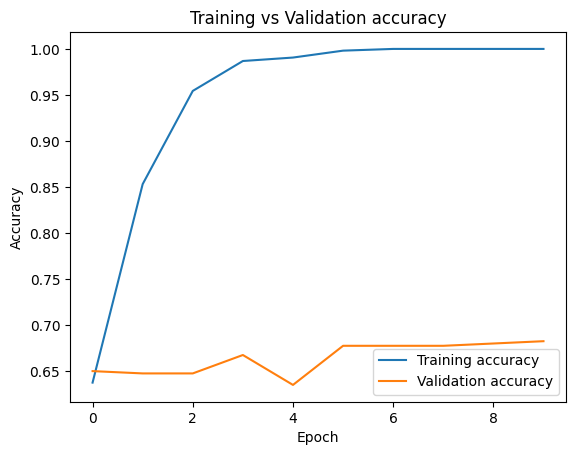

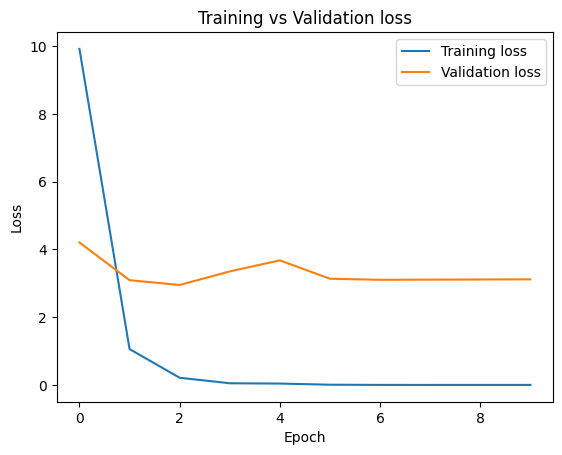

50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 268ms/step - accuracy: 0.6688 - loss: 3.2701


Test accuracy: 0.6825000047683716


In [17]:
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training vs Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Training vs Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 100% training accuracy and 68.25% validation accuracy suggests overfitting
test_loss, test_acc = model.evaluate(validation_generator, steps=50)
print(f"Test accuracy: {test_acc}")

model.save("cats_vs_dogs_model.h5")

In [16]:
test_photo = load_img(test_path + "\\dogs\\1002.jpeg", target_size=(256, 256))
prediction = model.predict(np.expand_dims(img_to_array(test_photo), axis=0))
print("Dog" if prediction[0][0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Dog
